In [1]:

import numpy as np 
import pandas as pd 

In [2]:

NORMALIZATION_BAND_NUMBER = 48
SPECTRUM_START_IDX = 0
SPECTRUM_END_IDX = 256

In [3]:
import requests
from tqdm import tqdm
import traceback
from pprint import pprint
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import gc
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import glob
from pprint import pprint
import xml.etree.ElementTree as ET
import concurrent.futures
import time
import threading
import pickle
import traceback
import shutil

In [4]:
F0 = np.array([
  136.1259307,
  129.8781929,
  125.1457188,
  120.4566749,
  115.2187742,
  110.7989129,
  105.971862,
  102.2853476,
  98.83159112,
  95.00990644,
  91.72241746,
  88.63043389,
  85.44216416,
  83.09659958,
  80.7461688,
  77.99745659,
  75.43755054,
  72.53298554,
  70.30310472,
  67.71506702,
  65.53063581,
  63.51647332,
  61.49193881,
  59.39769145,
  57.24811211,
  55.56974549,
  53.96628612,
  52.39858882,
  50.94286582,
  49.55873832,
  47.99340839,
  46.35543865,
  45.11640663,
  43.75374359,
  42.46741487,
  41.1950428,
  39.93375405,
  38.7480202,
  37.63257797,
  36.52968828,
  35.48372942,
  34.51571377,
  33.5041102,
  32.62925225,
  31.80035805,
  30.98128654,
  30.16775831,
  29.32709974,
  28.56074168,
  27.8298174,
  27.0453247,
  26.30808675,
  25.51810387,
  24.75010497,
  24.00573968,
  23.24760491,
  22.51761852,
  21.78398871,
  21.06792047,
  20.39822233,
  19.7458807,
  19.11661541,
  18.44061437,
  17.83250529,
  17.26068394,
  16.65126453,
  16.11545704,
  15.61912435,
  15.1210474,
  14.62910738,
  14.16359209,
  13.72237684,
  13.31430194,
  12.94713935,
  12.56233275,
  12.18239943,
  11.79722098,
  11.38810049,
  11.04636914,
  10.71621297,
  10.38904988,
  10.06620698,
  9.753295821,
  9.46418631,
  9.201075776,
  8.960974818,
  8.732115834,
  8.508712424,
  8.28861478,
  8.070068082,
  7.850866176,
  7.629585176,
  7.417896212,
  7.21399149,
  7.014245694,
  6.819995994,
  6.637200746,
  6.463212542,
  6.291676014,
  6.122400975,
  5.952327234,
  5.785907458,
  5.631916792,
  5.48221029,
  5.338864421,
  5.183886388,
  5.053359936,
  4.941756508,
  4.835098184,
  4.719922707,
  4.619729215,
  4.511137419,
  4.407240202,
  4.306184976,
  4.210413629,
  4.117013411,
  4.012368768,
  3.918726643,
  3.824014432,
  3.725826304,
  3.646586732,
  3.564719937,
  3.488199195,
  3.397463341,
  3.32250234,
  3.262984894,
  3.190955311,
  3.122692223,
  3.056477464,
  2.991274348,
  2.926566072,
  2.864612339,
  2.802940836,
  2.743157021,
  2.685370618,
  2.628641884,
  2.571929704,
  2.517226294,
  2.465127643,
  2.414375576,
  2.365285234,
  2.316701141,
  2.26923212,
  2.222564505,
  2.178496705,
  2.135290025,
  2.092826765,
  2.051565701,
  2.010893773,
  1.971470582,
  1.932492639,
  1.893925453,
  1.853239032,
  1.814419696,
  1.780829606,
  1.751599126,
  1.715922793,
  1.680125966,
  1.647791753,
  1.621454182,
  1.593640531,
  1.560460708,
  1.532378246,
  1.507178355,
  1.480349348,
  1.454525518,
  1.426003985,
  1.40026592,
  1.376814112,
  1.351395724,
  1.327241488,
  1.303320437,
  1.279240078,
  1.255715058,
  1.232621586,
  1.209534773,
  1.186777237,
  1.163774025,
  1.141839466,
  1.121354795,
  1.102697582,
  1.084984542,
  1.06779729,
  1.050654559,
  1.034116451,
  1.018239678,
  1.003106371,
  0.987228033,
  0.971082552,
  0.954532246,
  0.938549781,
  0.922761605,
  0.90746215,
  0.892772367,
  0.876952832,
  0.86169586,
  0.846904043,
  0.832961745,
  0.820193322,
  0.808495532,
  0.796418017,
  0.784036511,
  0.771772032,
  0.760169612,
  0.74902997,
  0.737997332,
  0.727055348,
  0.716477866,
  0.704633464,
  0.691770452,
  0.681177697,
  0.668685204,
  0.6563386,
  0.643784606,
  0.630929839,
  0.618670348,
  0.605670184,
  0.593191697,
  0.582320158,
  0.571630629,
  0.561438106,
  0.551831735,
  0.542986524,
  0.534529199,
  0.526707332,
  0.518722109,
  0.511109087,
  0.50373316,
  0.496221855,
  0.489530981,
  0.482582186,
  0.475974536,
  0.469794569,
  0.463575699,
  0.458286546,
  0.452850271,
  0.447197638,
  0.441572082,
  0.43580287,
  0.430755766,
  0.425717099,
  0.420589447,
  0.41588213,
  0.410468477,
  0.405233536,
  0.399887123,
  0.394668014,
  0.389642973,
  0.384580319,
  0.379611238,
  0.374544041,
  0.369613524,
  0.364863435,
  0.360132602,
  0.355533758,
  0.350967069,
]).reshape(256,1,1)


In [5]:
F0.shape

(256, 1, 1)

In [6]:
D_AU = 1

In [7]:
class utils:
    @staticmethod
    def extract_sequence_numbers(file_path):
        """
        Extracts the text content of <sequence_number> elements from an XML file.

        Args:
            file_path (str): The path to the XML file.

        Returns:
            list: A list of text contents from <sequence_number> elements.
        """
        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Find all sequence_number elements
        sequence_numbers = root.findall('.//{http://pds.nasa.gov/pds4/pds/v1}elements')

        # Extract the text content from each <sequence_number> element
        return [int(sequence_number.text) for sequence_number in sequence_numbers]
    @staticmethod
    def find_xml_files(base_path):
        """
        Finds all XML files matching the pattern /data/calibrated/*/*.xml within the given base path.

        Args:
            base_path (str): The base directory path where the search begins.

        Returns:
            list: A list of paths to the matching XML files.
        """
        # Define the search pattern
        pattern = os.path.join(base_path, 'data', 'calibrated', '*', '*.xml')

        # Use glob to find all files matching the pattern
        matching_files = glob.glob(pattern)
        matching_files.sort()
        return matching_files
    
    @staticmethod
    def find_qub_files(base_path):
        """
        Finds all .qub files matching the pattern /data/calibrated/*/*.qub within the given base path.

        Args:
            base_path (str): The base directory path where the search begins.

        Returns:
            list: A list of paths to the matching .qub files.
        """
        # Define the search pattern
        pattern = os.path.join(base_path, 'data', 'calibrated', '*', '*.qub')

        # Use glob to find all files matching the pattern
        matching_files = glob.glob(pattern)
        matching_files.sort()
        return matching_files
    @staticmethod
    def get_image_array(qub_path,shape):
        """
        Args:
            qub_path : path to the .qub file
            shape : shape of the image of form (channels,height,width)
        returns:
            a numpy array reshaped in the shape provided
        """
        with open(qub_path, 'rb') as f:
            img = np.frombuffer(f.read(), dtype=np.float32).reshape(*shape)
        return img

    @staticmethod
    def get_image(base_path):
        """
        Args:
            base_path : Base directory path to the data. Which means the path to directory which contains the browse, data geometyr and miscellaneous folder
        returns:
            A list of images with the radiance resized and resahped. To visualize it you need to do min max scaling and stuff
        """
        xml_files = utils.find_xml_files(base_path)
        image_files = utils.find_qub_files(base_path)
        shapes = [utils.extract_sequence_numbers(xml_file) for xml_file in xml_files]
        images = [utils.get_image_array(qub_path,shape) for qub_path,shape in zip(image_files,shapes)]
        return images
    @staticmethod
    def read_misc_files_into_df(file_path):
        with open(file_path) as f:
            data = f.read()
        rows = data.split('\n')
        parsed_list = [' '.join(row.split()).split() for row in rows]
        return pd.DataFrame(parsed_list)
    
    @staticmethod
    def _get_misc_files(base_path):
        """
        Args:
            base_path : Base directory path to the data. Which means the path to directory which contains the browse, data geometyr and miscellaneous folder
        returns:
            A dictionary of miscellaneous files converted to the dataframe 
        """
        pattern = os.path.join(os.path.join(base_path, 'miscellaneous', 'calibrated', '*', '*.*'))
        matching_files = glob.glob(pattern)
        matching_files.sort()
        
        dfs = {}
        for file_path in matching_files:
            print(file_path)
            _, file_extension = os.path.splitext(file_path)
            dfs[file_extension] = utils.read_misc_files_into_df(file_path).dropna()
        return dfs
    @staticmethod
    def get_misc_files(base_path):
        """
        Args:
            base_path : Base directory path to the data. Which means the path to directory which contains the browse, data geometyr and miscellaneous folder
        returns:
            A dictionary of miscellaneous files converted to the dataframe 
        """
        
        dfs = utils._get_misc_files(base_path)
        dfs['.spm'] = utils.process_spm_df(dfs['.spm'])
        dfs['.oat'] = utils.process_oat_df(dfs['.oat'])
        return dfs
    @staticmethod
    def convert_to_reflectance(data, solar_zenith_angle):
        return (np.pi * data)/(np.cos(solar_zenith_angle * np.pi / 180) * F0 * D_AU**2)
    
    @staticmethod
    def process_spm_df(spm_df):
        column_names = [
            "Record type", "Physical record number", "Block length",
        #     "Year",
            "Month",
            "Date",
            "Hour",
            "Minute",
            "Second",
            "Millisec", "Satellite position X", "Satellite position Y",
            "Satellite position Z", "Satellite velocity X-dot",
            "Satellite velocity Y-dot", "Satellite velocity Z-dot",
            "Phase angle", "Sun aspect", "Sun Azimuth",
            "Sun Elevation",
        ]

        # Assign the new column names
        spm_df.columns = column_names

        # Convert the columns to the appropriate data types
        spm_df["Record type"] = spm_df["Record type"].astype(str)
        spm_df["Physical record number"] = spm_df["Physical record number"].astype(np.int32)
        spm_df["Block length"] = spm_df["Block length"].astype(np.int32)
        # spm_df['Year'] = spm_df['Year'].astype(np.int32)
        spm_df['Month'] = spm_df['Month'].astype(np.int32)
        spm_df['Date'] = spm_df['Date'].astype(np.int32)
        spm_df['Hour'] = spm_df['Hour'].astype(np.int32)
        spm_df['Minute'] = spm_df['Minute'].astype(np.int32)
        spm_df['Second'] = spm_df['Second'].astype(np.int32)
        spm_df['Millisec'] = spm_df['Millisec'].astype(np.int32)
        # For "Time in UTC", assuming it is in the format 'YYYYMMDDHHMMSS', convert to datetime

        spm_df["Satellite position X"] = spm_df["Satellite position X"].astype(np.float32)
        spm_df["Satellite position Y"] = spm_df["Satellite position Y"].astype(np.float32)
        spm_df["Satellite position Z"] = spm_df["Satellite position Z"].astype(np.float32)
        spm_df["Satellite velocity X-dot"] = spm_df["Satellite velocity X-dot"].astype(np.float32)
        spm_df["Satellite velocity Y-dot"] = spm_df["Satellite velocity Y-dot"].astype(np.float32)
        spm_df["Satellite velocity Z-dot"] = spm_df["Satellite velocity Z-dot"].astype(np.float32)
        spm_df["Phase angle"] = spm_df["Phase angle"].astype(np.float32)
        spm_df["Sun aspect"] = spm_df["Sun aspect"].astype(np.float32)
        spm_df["Sun Azimuth"] = spm_df["Sun Azimuth"].astype(np.float32)
        spm_df["Sun Elevation"] = spm_df["Sun Elevation"].astype(np.float32)
        # spm_df["Orbit Limb Direction"] = spm_df["Orbit Limb Direction"].astype(int)
        return spm_df
    @staticmethod
    def process_oat_df(oat_df):   
        columns_names = [   
            "Record type",
            "Physical record number in this file",
            "Block length in bytes",
            "Month",
            "Date",
            "Hour",
            "Minute",
            "Second",
            "Millisec",
            "Lunar Position X (kms) - J2000 Earth Centre Frame",
            "Lunar Position Y (kms) - J2000 Earth Centre Frame",
            "Lunar Position Z (kms) - J2000 Earth Centre Frame",
            "Satellite position X (kms) - Note-3",
            "Satellite position Y (kms) - Note-3",
            "Satellite position Z (kms) - Note-3",
            "Satellite velocity X-dot (kms/sec) - Note-3",
            "Satellite velocity Y-dot (kms/sec) - Note-3",
            "Satellite velocity Z-dot (kms/sec)  - Note-3",
            "Altitude Inertial Q1",
            "Altitude Inertial Q2",
            "Altitude Inertial Q3",
            "Altitude Inertial Q4",
            "Earth Fixed IAU frame Q1",
            "Earth Fixed IAU frame Q2",
            "Earth Fixed IAU frame Q3",
            "Earth Fixed IAU frame Q4"
            "Lunar Fixed IAU frame Q1",
            "Lunar Fixed IAU frame Q2",
            "Lunar Fixed IAU frame Q3",
            "Lunar Fixed IAU frame Q4",
            "Latitude of sub-satellite point (deg)",
            "Longitude of sub-satellite point (deg)",
            "Solar Azimuth",
            "Solar Elevation",
            "Latitude  (deg)",
            "Longitude (deg)",
            "Satellite altitude (kms)",
            "Angle between +Roll and Velocity Vector",
            "Eclipse Status - Note-4",
            "Emission Angle",
            "Sun Angle w.r.t -ve Yaw (Phase angle)",
            "Angle between +Yaw and Nadir",
            "Slant Range (Km)",
            "Orbit No",
            "Solar Zenith Angle",
            "Angle between Payload FoV axis and velocity vector",
            "X  (yaw) angle",
            "Y  (roll) angle",
            "Z(pitch) angle",
        ]
        oat_df.columns = columns_names
        oat_df.iloc[:,1:9] = oat_df.iloc[:,1:9].astype(np.int32)
        oat_df.iloc[:,9:42] = oat_df.iloc[:,9:42].astype(np.float32)
        oat_df.iloc[:,42] = oat_df.iloc[:,42].astype(np.int32)
        oat_df.iloc[:,43:] = oat_df.iloc[:,43:].astype(np.float32)
        return oat_df
    @staticmethod
    def _read_partial_data_of_given_height(qub_path,image_height, image_width,row = 0, height = 250):
        image = []
        data_count = image_width * height
        channel_size = image_height * image_width
        with open(qub_path,'rb') as f:
            for channel_idx in range(SPECTRUM_START_IDX,SPECTRUM_END_IDX):
                offset = channel_idx * channel_size * 4 + row * image_width  # float32 has 4 bytes
                f.seek(offset)
                channel_data = np.fromfile(f, dtype=np.float32, count=data_count)
                image.append(channel_data.reshape((1,height, image_width)))
        return np.vstack(image)
    @staticmethod
    def get_partial_image_from_height(base_path, row, height):
        xml_files = utils.find_xml_files(base_path)
        image_files = utils.find_qub_files(base_path)
        shapes = [utils.extract_sequence_numbers(xml_file) for xml_file in xml_files]
        images = [utils._read_partial_data_of_given_height(qub_path,shape[1], shape[2], row, height) for qub_path,shape in zip(image_files,shapes)]
        return images
    @staticmethod
    def get_image_meta_data(base_path):
        xml_files = utils.find_xml_files(base_path)
        shapes = [utils.extract_sequence_numbers(xml_file) for xml_file in xml_files]
        print(f' {len(shapes)} files present')
        for i in range(1, len(shapes) + 1):
            print(f'{i}. Image Height : {shapes[i-1][1]}  Image Width : {shapes[i-1][2]}')
        return shapes
    @staticmethod
    def quantile_scaling(img, min_quantile = 0.0001, max_quantile = 0.9999):
        img_slice = np.clip(img, np.quantile(img,0.0001), np.quantile(img, 0.9999))
        img_slice = (img_slice/(img_slice.max() - img_slice.min()) * 255).astype(np.uint8)
        return img_slice
    @staticmethod
    def normalize_the_spectrum(spectrum, ):
        normalization_divisor = spectrum[NORMALIZATION_BAND_NUMBER - SPECTRUM_START_IDX]
        return spectrum / normalization_divisor
        
        

In [9]:
data_path='/kaggle/input/isro-chandrayan-iirs/other/dataset-25/1/data/ch2_iir_nci_20200625T1205499124_d_img_d18'

In [10]:
images = utils.get_partial_image_from_height(data_path,0,1500)

In [11]:
misc_dfs = utils.get_misc_files(data_path)

/kaggle/input/isro-chandrayan-iirs/other/dataset-25/1/data/ch2_iir_nci_20200625T1205499124_d_img_d18/miscellaneous/calibrated/20200625/ch2_iir_nci_20200625T1205499124_d_img_d18.lbr
/kaggle/input/isro-chandrayan-iirs/other/dataset-25/1/data/ch2_iir_nci_20200625T1205499124_d_img_d18/miscellaneous/calibrated/20200625/ch2_iir_nci_20200625T1205499124_d_img_d18.oat
/kaggle/input/isro-chandrayan-iirs/other/dataset-25/1/data/ch2_iir_nci_20200625T1205499124_d_img_d18/miscellaneous/calibrated/20200625/ch2_iir_nci_20200625T1205499124_d_img_d18.oath
/kaggle/input/isro-chandrayan-iirs/other/dataset-25/1/data/ch2_iir_nci_20200625T1205499124_d_img_d18/miscellaneous/calibrated/20200625/ch2_iir_nci_20200625T1205499124_d_img_d18.spm


In [12]:
oat_df = misc_dfs['.oat']

In [13]:
oat_df

,Record type,Physical record number in this file,Block length in bytes,Month,Date,Hour,Minute,Second,Millisec,Lunar Position X (kms) - J2000 Earth Centre Frame,...,Emission Angle,Sun Angle w.r.t -ve Yaw (Phase angle),Angle between +Yaw and Nadir,Slant Range (Km),Orbit No,Solar Zenith Angle,Angle between Payload FoV axis and velocity vector,X (yaw) angle,Y (roll) angle,Z(pitch) angle
0,ORBTATTD,1,6282020,6,25,12,5,47,750,-312619.875,...,0.0,62.257999,0.114,106.926003,3725,62.351002,90.606003,-0.041114,0.065924,-0.092638
1,ORBTATTD,2,6282020,6,25,12,5,47,790,-312619.90625,...,0.0,62.256001,0.114,106.926003,3725,62.348999,90.606003,-0.041122,0.065926,-0.092645
2,ORBTATTD,3,6282020,6,25,12,5,47,830,-312619.9375,...,0.0,62.254002,0.114,106.927002,3725,62.347,90.606003,-0.041113,0.065963,-0.092642
3,ORBTATTD,4,6282020,6,25,12,5,47,870,-312619.96875,...,0.0,62.251999,0.114,106.927002,3725,62.345001,90.606003,-0.041104,0.065999,-0.092639
4,ORBTATTD,5,6282020,6,25,12,5,47,910,-312619.96875,...,0.0,62.25,0.114,106.928001,3725,62.342999,90.606003,-0.041098,0.066024,-0.092636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15934,ORBTATTD,15935,6282020,6,25,12,16,25,110,-312968.21875,...,0.0,30.162001,0.095,115.301003,3725,30.250999,90.474998,-0.070529,0.033615,-0.088371
15935,ORBTATTD,15936,6282020,6,25,12,16,25,150,-312968.21875,...,0.0,30.16,0.094,115.302002,3725,30.249001,90.474998,-0.070535,0.033583,-0.08832
15936,ORBTATTD,15937,6282020,6,25,12,16,25,190,-312968.25,...,0.0,30.158001,0.094,115.302002,3725,30.247,90.474998,-0.070547,0.033576,-0.088285
15937,ORBTATTD,15938,6282020,6,25,12,16,25,230,-312968.28125,...,0.0,30.156,0.094,115.302002,3725,30.245001,90.474998,-0.070567,0.033609,-0.088275


In [14]:
mean_zenith_angle = oat_df.loc[:,'Solar Zenith Angle'].mean()
print(mean_zenith_angle)

46.27289183746056


In [15]:
len(images)


1

In [16]:
image = images[0]


In [17]:
print(image.shape)

(256, 1500, 250)


In [19]:
reflectance_image = utils.convert_to_reflectance(image[:,:5000,:],mean_zenith_angle)

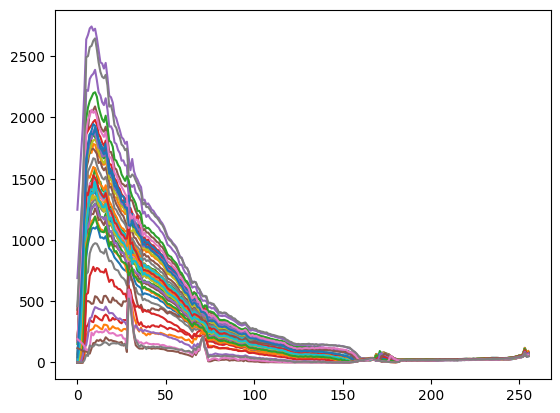

In [20]:
testing_array=[]
for i in [250,500,750,1000]:
    for j in [10,30,50,70,90,130,150,170,190,210,230,249]:
        plt.plot(image[0:256,i,j])
        testing_array.append(image[:,i,j])
plt.show()

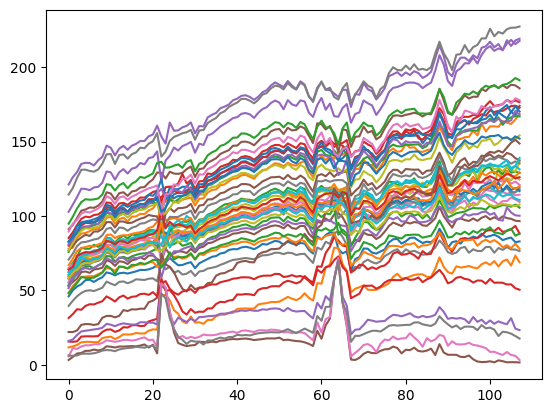

In [21]:
for i in [250,500,750,1000]:
    for j in [10,30,50,70,90,130,150,170,190,210,230,249]:
        plt.plot(reflectance_image[7:115,i,j])
plt.show()

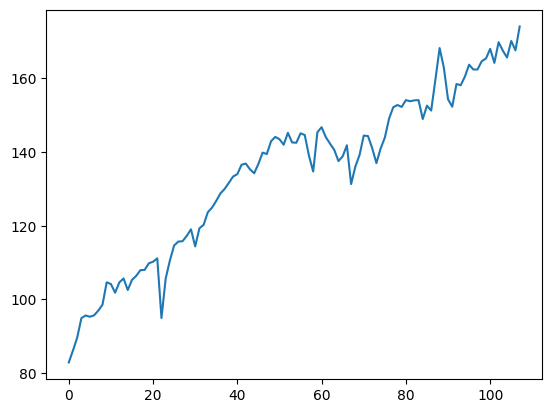

In [22]:
plt.plot(reflectance_image[7:115,250,10])

In [23]:
test1=testing_array[0]

In [24]:
test1.shape

(256,)

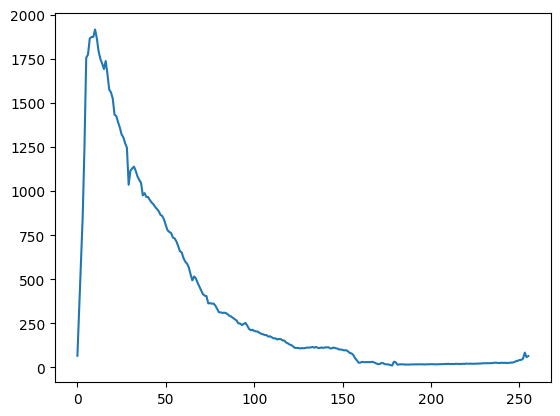

In [25]:
plt.plot(test1)

In [26]:
temperature_bands=test1[225:255]
print(temperature_bands.shape)

(30,)


In [27]:
print(temperature_bands[29])

58.376793


In [29]:
wavelength_bands=[4504.1,4521,4537.8,4554.7,4571.5,4588.4,4605.2,4622.1,4638.9,4655.8,4672.6,4689.5,4706.3,4723.2,4740,4756.9,4773.8,4790.6,4807.5,4824.3,4841.2,4858,4874.9,4891.7,4908.6,4925.4,4942.3,4959.1,4976,4992.8]

In [30]:
wavelength_bands_m = [wavelength / 1e9 for wavelength in wavelength_bands]
print(wavelength_bands_m)

[4.504100000000001e-06, 4.521e-06, 4.5378e-06, 4.5547e-06, 4.5715e-06, 4.5884e-06, 4.6051999999999995e-06, 4.6221e-06, 4.6389e-06, 4.6558e-06, 4.6726e-06, 4.6895e-06, 4.7063e-06, 4.7232e-06, 4.74e-06, 4.756899999999999e-06, 4.7738e-06, 4.7906e-06, 4.8075e-06, 4.8243000000000005e-06, 4.8411999999999995e-06, 4.858e-06, 4.8749e-06, 4.8917e-06, 4.908600000000001e-06, 4.9253999999999995e-06, 4.9423e-06, 4.9591000000000005e-06, 4.976e-06, 4.9928e-06]


In [31]:

print(temperature_bands)

[21.495556 21.325836 22.137516 21.965006 23.593767 23.738714 24.003075
 23.69432  24.457972 24.230236 25.691742 26.878544 26.263874 25.398115
 24.863976 26.825312 25.654455 26.347185 24.890942 25.776861 27.626648
 27.471346 30.079468 35.159435 37.40024  41.92007  43.05897  49.1861
 84.06147  58.376793]


In [32]:
def normalize_pixel(pixel):
    return pixel/pixel[47]

In [33]:
normal_image=normalize_pixel(test1)

In [143]:

wavelengths1 = mapdf['center_wavelength'].values

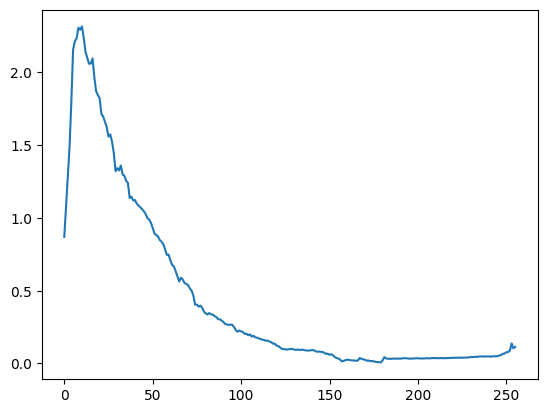

In [150]:
plt.plot(normal_image)

In [37]:
import math
mapdf=pd.read_csv('/kaggle/input/testimg/ch2_iirs_wavelength.csv')
def radiance_to_reflectance(pixel, mean_zenith_angle, F0):
    h = 6.62607015e-34  
    c = 3e8 
    e = 2.718281828459045  
    k = 1.380649e-23  
    pi = 3.141592653589793  
    emissivity=0.95
    temperature_bands=pixel[225:255]*10
    wavelength_bands_metres=[4.504100000000001e-06, 4.521e-06, 4.5378e-06, 4.5547e-06, 4.5715e-06, 4.5884e-06, 4.6051999999999995e-06, 4.6221e-06, 4.6389e-06, 4.6558e-06,
    4.6726e-06, 4.6895e-06, 4.7063e-06, 4.7232e-06, 4.74e-06, 4.756899999999999e-06, 4.7738e-06, 4.7906e-06, 4.8075e-06, 4.8243000000000005e-06, 4.8411999999999995e-06, 4.858e-06,
    4.8749e-06, 4.8917e-06, 4.908600000000001e-06, 4.9253999999999995e-06, 4.9423e-06, 4.9591000000000005e-06, 4.976e-06, 4.9928e-06]
    temp_sum=0
    for i in range(0,30): 
        numerator = h * c
        denominator = wavelength_bands_metres[i] * k* math.log(emissivity * pi * ((2 * h * c**2) / (temperature_bands[i]*wavelength_bands_metres[i]**5)) + 1)
        temp_sum+= numerator/denominator
    avg=temp_sum/30
    wavelengths = mapdf['center_wavelength'].values
    wavelengths_meters = wavelengths * 1e-9
    heat_effect = (emissivity * pi * (2 * h * c**2)) / (wavelengths_meters**5 * (np.exp(h * c / (wavelengths_meters * k * avg)) - 1))
    adjusted_radiance = np.copy(pixel)
    adjusted_radiance[7:] -= heat_effect[7:]
    cos_zenith = np.cos(np.deg2rad(mean_zenith_angle)) 
    F0_flattened=F0.flatten()
    reflectance = adjusted_radiance / F0_flattened*cos_zenith
    return reflectance[7:115]


In [38]:
import math
mapdf=pd.read_csv('/kaggle/input/testimg/ch2_iirs_wavelength.csv')
def radiance_to_reflectance2(pixel, mean_zenith_angle, F0):
    h = 6.62607015e-34  
    c = 3e8 
    e = 2.718281828459045  
    k = 1.380649e-23  
    pi = 3.141592653589793  
    emissivity=0.95
    temperature_bands=pixel[225:255]*10
    wavelength_bands_metres=[4.504100000000001e-06, 4.521e-06, 4.5378e-06, 4.5547e-06, 4.5715e-06, 4.5884e-06, 4.6051999999999995e-06, 4.6221e-06, 4.6389e-06, 4.6558e-06,
    4.6726e-06, 4.6895e-06, 4.7063e-06, 4.7232e-06, 4.74e-06, 4.756899999999999e-06, 4.7738e-06, 4.7906e-06, 4.8075e-06, 4.8243000000000005e-06, 4.8411999999999995e-06, 4.858e-06,
    4.8749e-06, 4.8917e-06, 4.908600000000001e-06, 4.9253999999999995e-06, 4.9423e-06, 4.9591000000000005e-06, 4.976e-06, 4.9928e-06]

    numerator = h * c
    denominator = wavelength_bands_metres* k* math.log(emissivity * pi * ((2 * h * c**2) / (temperature_bands*wavelength_bands_metres**5)) + 1)
    avg=(np.sum(numerator/denominator))/30
    wavelengths = mapdf['center_wavelength'].values
    wavelengths_meters = wavelengths * 1e-9
    heat_effect = (emissivity * pi * (2 * h * c**2)) / (wavelengths_meters**5 * (np.exp(h * c / (wavelengths_meters * k * avg)) - 1))
    adjusted_radiance = np.copy(pixel)
    adjusted_radiance[7:] -= heat_effect[7:]
    cos_zenith = np.cos(np.deg2rad(mean_zenith_angle)) 
    F0_flattened=F0.flatten()
    reflectance = adjusted_radiance / F0_flattened*cos_zenith
    return reflectance[7:115]


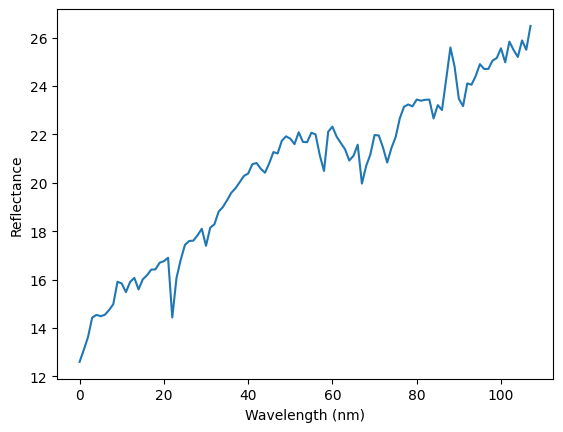

In [35]:
plt.plot(radiance_to_reflectance(test1,mean_zenith_angle,F0))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()


In [39]:
plt.plot(radiance_to_reflectance2(test1,mean_zenith_angle,F0))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

In [119]:
temp_sum=0
for i in range(0,30):
    temp_sum+=calculate_temperature(wavelength_bands_metres[i],temperature_bands[i])
temp_sum/=30
wavelengths = mapdf['center_wavelength'].values
wavelengths_meters = wavelengths * 1e-9
heat_effect = (emissivity * pi * (2 * h * c**2)) / (wavelengths_meters**5 * (np.exp(h * c / (wavelengths_meters * k * avg)) - 1))
adjusted_radiance = np.copy(test1)
adjusted_radiance[7:] -= heat_effect[7:]
cos_zenith = np.cos(np.deg2rad(mean_zenith_angle)) 
F0_flattened=F0.flatten()
reflectance = adjusted_radiance / F0_flattened*cos_zenith

159.96628392944973


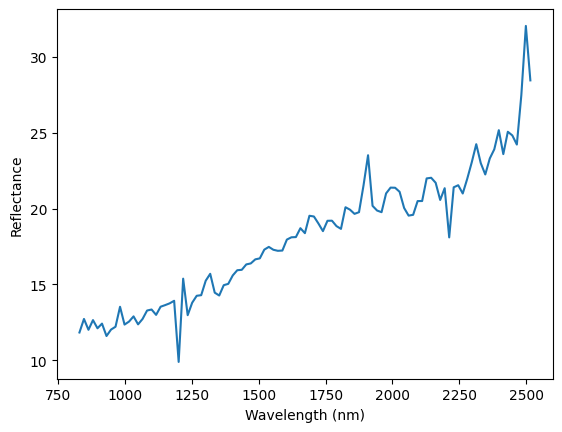

In [121]:
plt.plot(wavelengths[7:108], reflectance[7:108])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()


In [74]:
import math
def calculate_temperature(λ, I):
    numerator = h * c
    print(I)
    denominator = λ * k* math.log(emissivity * pi * ((2 * h * c**2) / (I * λ**5)) + 1)
    T = numerator / denominator
    return T

In [78]:
temperature_bands

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [75]:

h = 6.62607015e-34  
c = 3e8 
e = 2.718281828459045  
k = 1.380649e-23  
pi = 3.141592653589793  
emissivity=0.95

In [76]:
calculated_temp=[]
for i in range(0,30):
    x=calculate_temperature(wavelength_bands_m[i],temperature_bands[i])
    calculated_temp.append(x)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


/tmp/ipykernel_32/3758105265.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  denominator = λ * k* math.log(emissivity * pi * ((2 * h * c**2) / (I * λ**5)) + 1)


In [65]:
calculated_temp

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

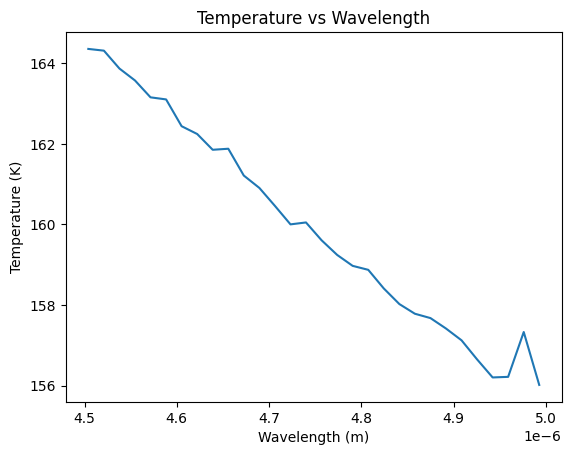

In [84]:
plt.plot(wavelength_bands_m, calculated_temp)
plt.xlabel('Wavelength (m)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs Wavelength')
plt.show()

In [85]:
avg=sum(calculated_temp)/len(calculated_temp)
print(avg)

159.96628392944973


In [86]:
mapdf=pd.read_csv('/kaggle/input/testimg/ch2_iirs_wavelength.csv')
print(mapdf)


     band_number  center_wavelength  band_width
0              1              712.3        19.8
1              2              729.2        19.9
2              3              746.0        20.0
3              4              762.9        20.1
4              5              779.7        20.2
..           ...                ...         ...
251          252             4942.3        23.5
252          253             4959.1        23.6
253          254             4976.0        23.6
254          255             4992.8        23.7
255          256             5009.7        23.8

[256 rows x 3 columns]


In [87]:
wavelengths = mapdf['center_wavelength'].values

In [88]:
print(wavelengths)

[ 712.3  729.2  746.   762.9  779.7  796.6  813.4  830.3  847.2  864.
  880.9  897.7  914.6  931.4  948.3  965.1  982.   998.8 1015.7 1032.5
 1049.4 1066.2 1083.1 1099.9 1116.8 1133.6 1150.5 1167.3 1184.2 1201.1
 1217.9 1234.8 1251.6 1268.5 1285.3 1302.2 1319.  1335.9 1352.7 1369.6
 1386.4 1403.3 1420.1 1437.  1453.8 1470.7 1487.5 1504.4 1521.2 1538.1
 1555.  1571.8 1588.7 1605.5 1622.4 1639.2 1656.1 1672.9 1689.8 1706.6
 1723.5 1740.3 1757.2 1774.  1790.9 1807.7 1824.6 1841.4 1858.3 1875.1
 1892.  1908.9 1925.7 1942.6 1959.4 1976.3 1993.1 2010.  2026.8 2043.7
 2060.5 2077.4 2094.2 2111.1 2127.9 2144.8 2161.6 2178.5 2195.3 2212.2
 2229.  2245.9 2262.8 2279.6 2296.5 2313.3 2330.2 2347.  2363.9 2380.7
 2397.6 2414.4 2431.3 2448.1 2465.  2481.8 2498.7 2515.5 2532.4 2549.2
 2566.1 2582.9 2599.8 2616.7 2633.5 2650.4 2667.2 2684.1 2700.9 2717.8
 2734.6 2751.5 2768.3 2785.2 2802.  2818.9 2835.7 2852.6 2869.4 2886.3
 2903.1 2920.  2936.8 2953.7 2970.6 2987.4 3004.3 3021.1 3038.  3054.8
 3071.7

In [89]:
wavelengths_meters = wavelengths * 1e-9
heat_effect = (emissivity * pi * (2 * h * c**2)) / (wavelengths_meters**5 * (np.exp(h * c / (wavelengths_meters * k * avg)) - 1))

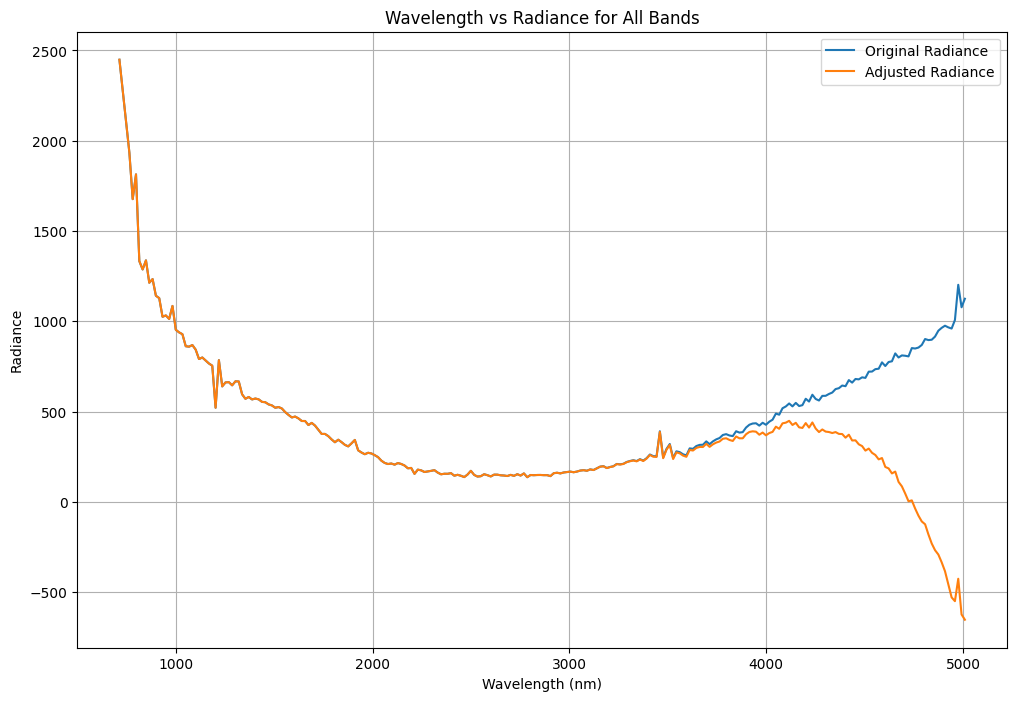

In [116]:
adjusted_radiance = np.copy(test1)
adjusted_radiance[7:] -= heat_effect[7:]

plt.figure(figsize=(12, 8))
plt.plot(wavelengths, test1, label='Original Radiance')
plt.plot(wavelengths, adjusted_radiance, label='Adjusted Radiance')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiance')
plt.title('Wavelength vs Radiance for All Bands')
plt.legend()
plt.grid(True)

plt.show()

In [117]:
cos_zenith = np.cos(np.deg2rad(mean_zenith_angle)) 
F0_flattened=F0.flatten()
corrected_radiance = adjusted_radiance / F0_flattened*cos_zenith

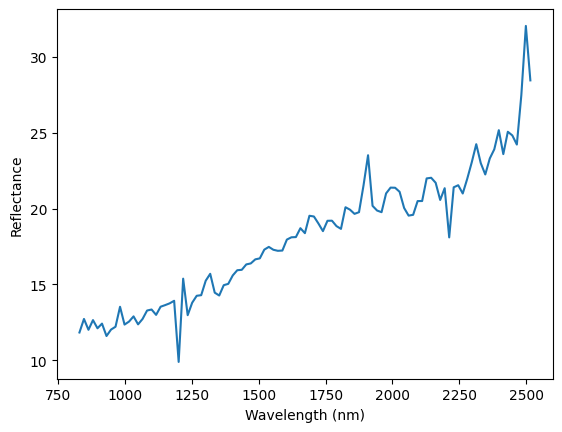

In [118]:
plt.plot(wavelengths[7:108], corrected_radiance[7:108])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

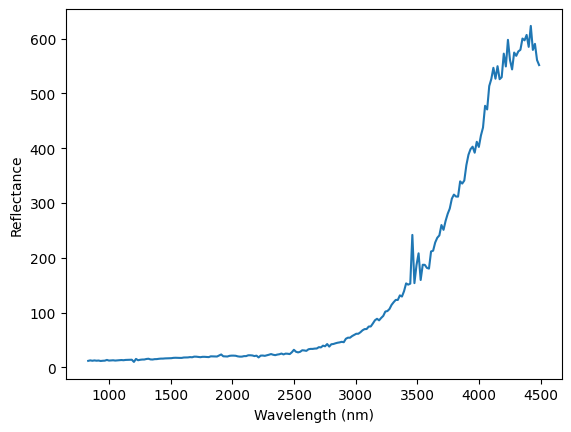

In [93]:
plt.plot(wavelengths[7:225], corrected_radiance[7:225])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

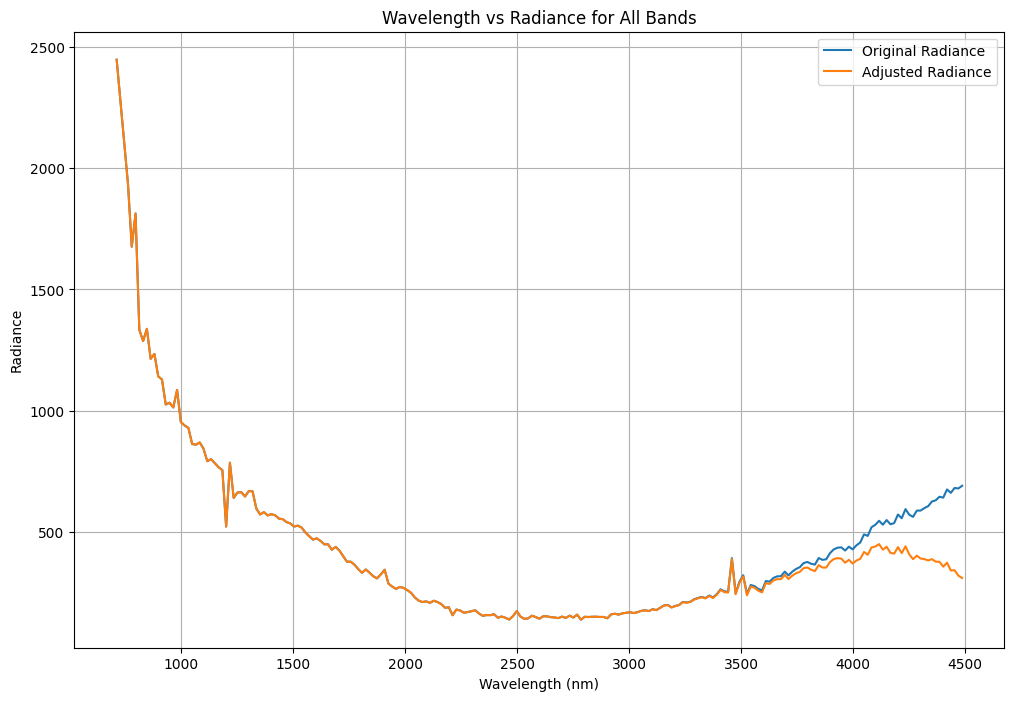

In [94]:
adjusted_radiance = np.copy(test1)
adjusted_radiance[7:] -= heat_effect[7:]

plt.figure(figsize=(12, 8))
plt.plot(wavelengths[:225], test1[:225], label='Original Radiance')
plt.plot(wavelengths[:225], adjusted_radiance[:225], label='Adjusted Radiance')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiance')
plt.title('Wavelength vs Radiance for All Bands')
plt.legend()
plt.grid(True)

plt.show()

In [95]:
cos_zenith = np.cos(np.deg2rad(mean_zenith_angle)) 
F0_flattened=F0.flatten()
corrected_radiance = adjusted_radiance / F0_flattened*cos_zenith

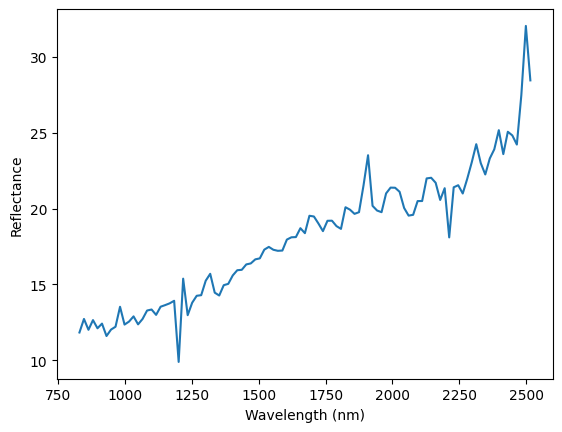

In [96]:
plt.plot(wavelengths[7:108], corrected_radiance[7:108])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

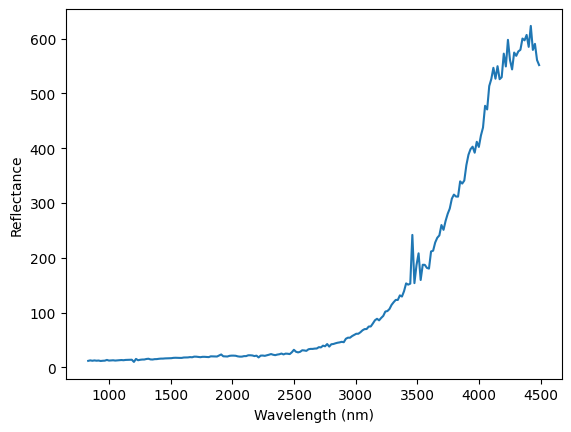

In [97]:
plt.plot(wavelengths[7:225], corrected_radiance[7:225])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

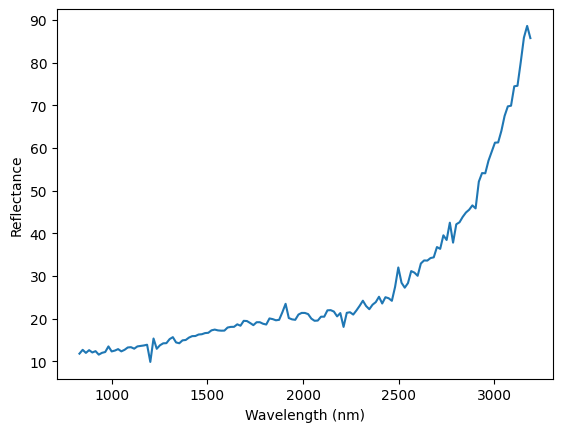

In [98]:
plt.plot(wavelengths[7:148], corrected_radiance[7:148])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

In [102]:
from scipy.signal import savgol_filter
def denoise(data, axis, window_size = 7, polyorder = 2):
    denoised_image = savgol_filter(data, window_length=window_size, polyorder=polyorder, axis=axis)
    return denoised_image
denoised_wavelength=denoise(corrected_radiance,-1)

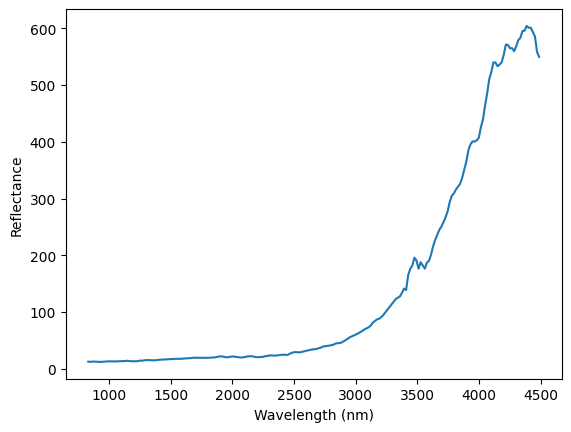

In [103]:

plt.plot(wavelengths[7:225], denoised_wavelength[7:225])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

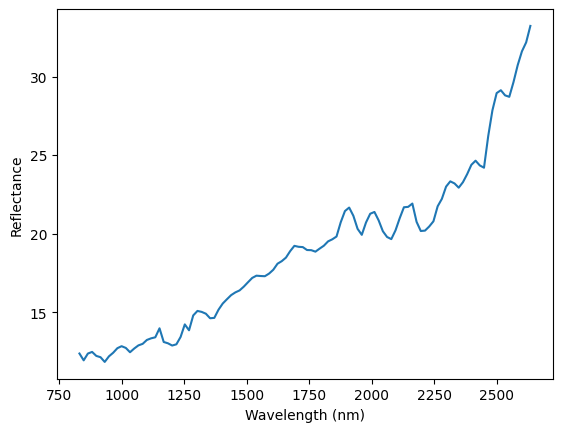

In [105]:

plt.plot(wavelengths[7:115], denoised_wavelength[7:115])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()